## waste classification using CNN model


In [1]:
pip install opencv.python


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


100%|██████████| 9999/9999 [00:24<00:00, 415.89it/s]


(22564, 2)


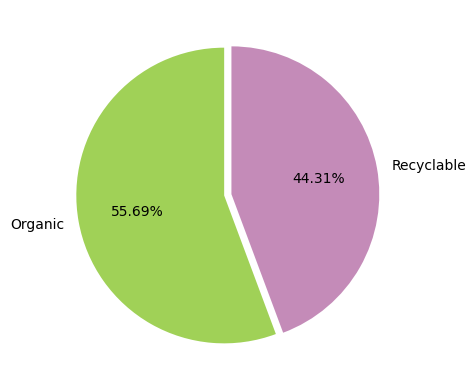

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

# visualization
x_data = []
y_data = []

# Correct indentation for nested loops
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

# Fix DataFrame creation
data = pd.DataFrame({'image': x_data, 'label': y_data})

print(data.shape)

# Correct pie chart visualization
colors = ['#a0d157', '#c48bb8']
plt.pie(data['label'].value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0])
plt.show()

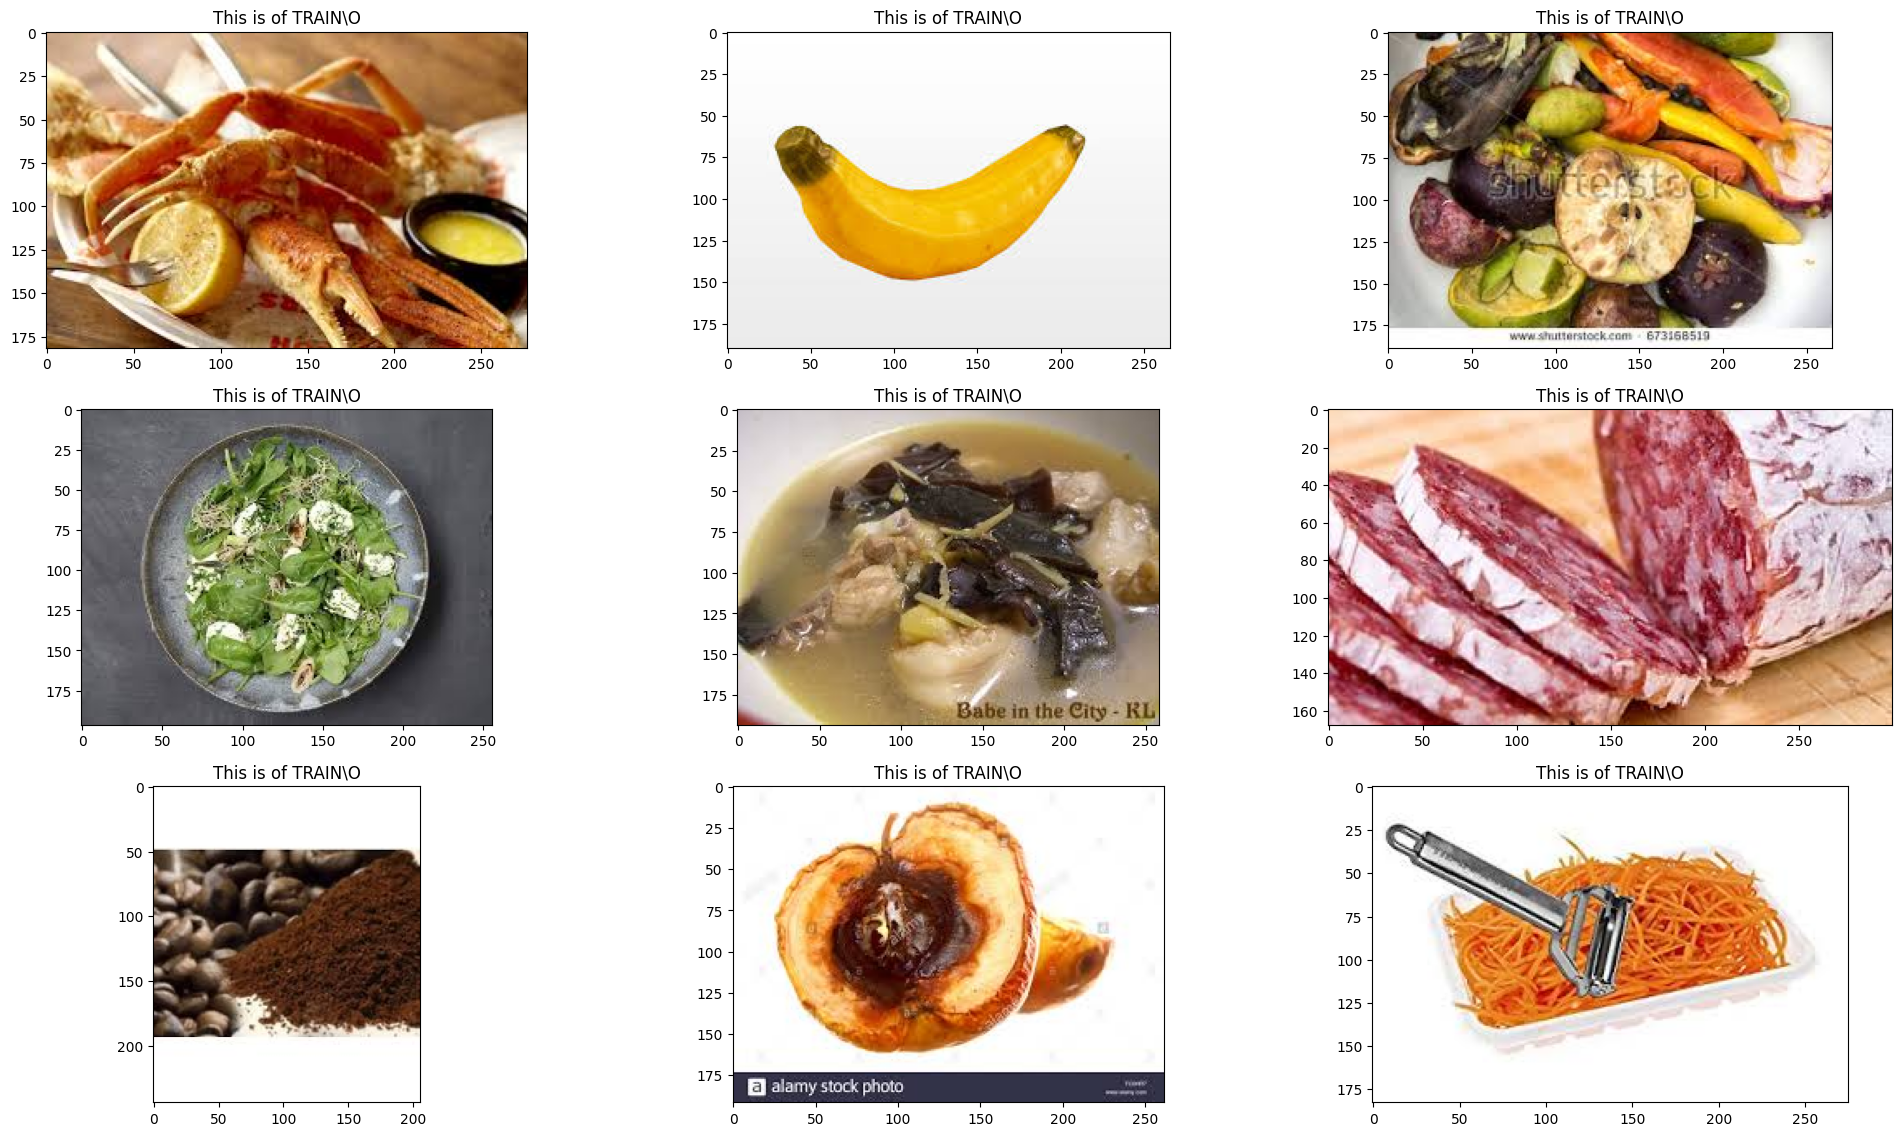

In [3]:
plt.figure(figsize=(20,15))
for i in range (9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [5]:
##CNN - Convolutional Neural Network

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss= "binary_crossentropy",
              optimizer = "adam",
              metrics =  ["accuracy"])
batch_size = 256

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")


test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")



Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [9]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 4438s 50s/step - accuracy: 0.7354 - loss: 0.6234 - val_accuracy: 0.8177 - val_loss: 0.4234
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 4854s 55s/step - accuracy: 0.8177 - loss: 0.4210 - val_accuracy: 0.8842 - val_loss: 0.3308
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2637s 30s/step - accuracy: 0.8330 - loss: 0.4026 - val_accuracy: 0.8663 - val_loss: 0.3369
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2365s 27s/step - accuracy: 0.8437 - loss: 0.3786 - val_accuracy: 0.8782 - val_loss: 0.3087
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 7295s 82s/step - accuracy: 0.8513 - loss: 0.3525 - val_accuracy: 0.8973 - val_loss: 0.2776
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3747s 42s/step - accuracy: 0.8720 - loss: 0.3131 - val_accuracy: 0.8942 - val_loss: 0.2801
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3508s 39s/step - accuracy: 0.8899 - loss: 0.2814 - val_accuracy: 0.8846 - val_loss: 0.2929
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2519s 28s/step - accuracy: 0.8947 - loss: 0.2658 - val_accu